

Problem Statement :
        Build the Image classification model by dividing the model in following Four stages :
            a. Loading and preprocessing the image
            b. Defining the model architecture
            c. Training the model
            d. Estimating the model’s performance.
            
                          ** A) MNIST Dataset **
            

# Step 01 - Loading Dataset

In [1]:
from tensorflow.keras.datasets import mnist

#For Visualization
import matplotlib.pyplot as plt

In [2]:
#Split dataset into training and testing sets
#load_data() automatically splits dataset into training and testing
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape #60,000 training examples

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

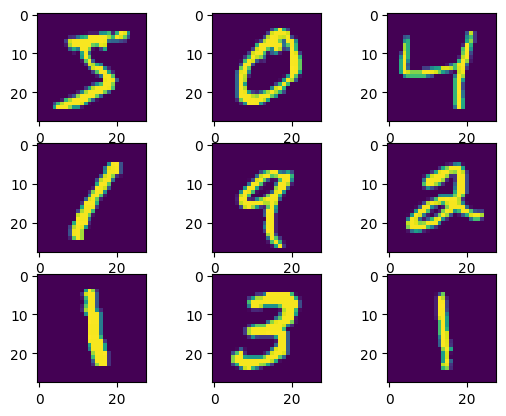

In [6]:
#Displaying some numbers
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

# Step 2 - Building a model

In [7]:
#[When a feature is present only that bit is set to 1 rest all 0] ---> One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [8]:
y_train[:5]
#First line in y_train represents 5 as '1' is present in position 5

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
#Do same for test data
y_test = to_categorical(y_test)

In [10]:
#Defining model for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Flatten,MaxPooling2D
from tensorflow.keras.optimizers import SGD
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer="he_uniform",input_shape=(28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer="he_uniform"))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt,loss='CategoricalCrossentropy',metrics=['accuracy'])
    return model

In [11]:
x_train.shape[0],28,28,1

(60000, 28, 28, 1)

In [12]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))

In [13]:
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [14]:
#For normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
model = define_model()

In [16]:
H = model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1567 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0557 - accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0357 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0253 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0117 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 9/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [17]:
y_output = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


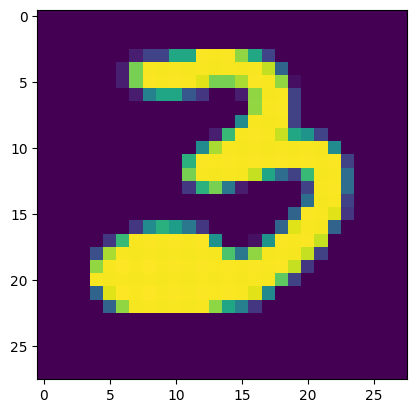

In [18]:
import random
index = random.randint(1,10000)
plt.imshow(x_test[index])

In [19]:
pred_num = max(y_output[index])
for i in range(len(y_output[index])):
    if(y_output[index][i] == pred_num):
        print("Predicted number is: ",i)
        break

Predicted number is:  3


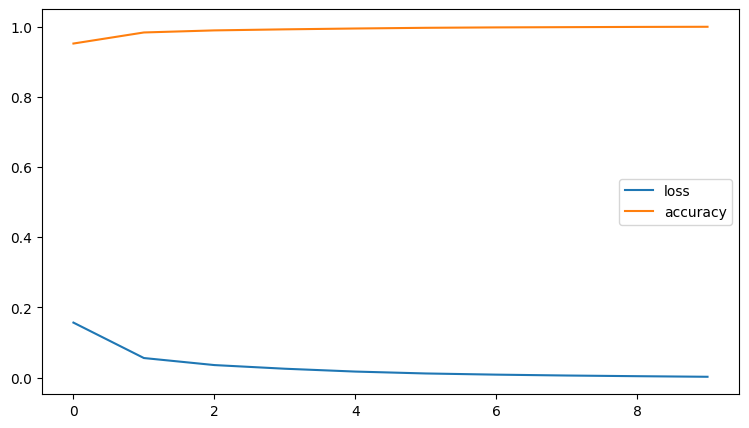

In [20]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()